In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
bank_note_data=pd.read_csv('archive/BankNote_Authentication.csv')

In [3]:
import random
import pathlib, os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
bank_note_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


The above concludes that we have 1372 rows and all are not null.

In [6]:
bank_note_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The data is not on the same scale as can be concluded from above.

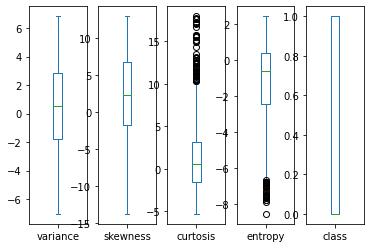

In [7]:
bank_note_data.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

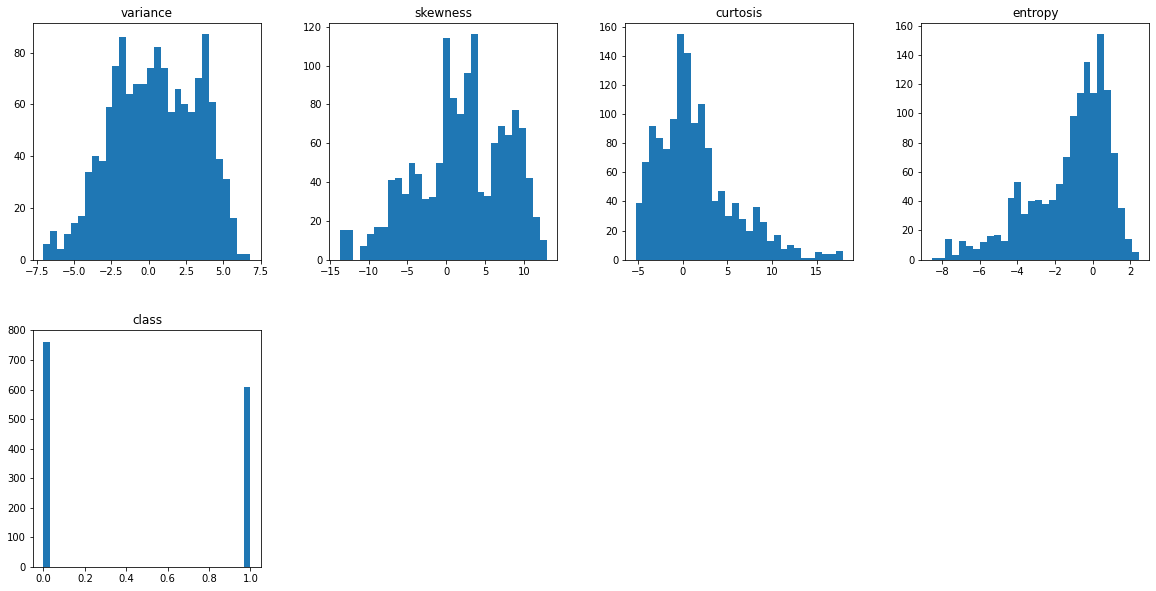

In [8]:
bank_note_data.hist(figsize=(20,10), grid =False, layout = (2,4), bins=30,)
plt.show()

In [9]:
bank_note_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


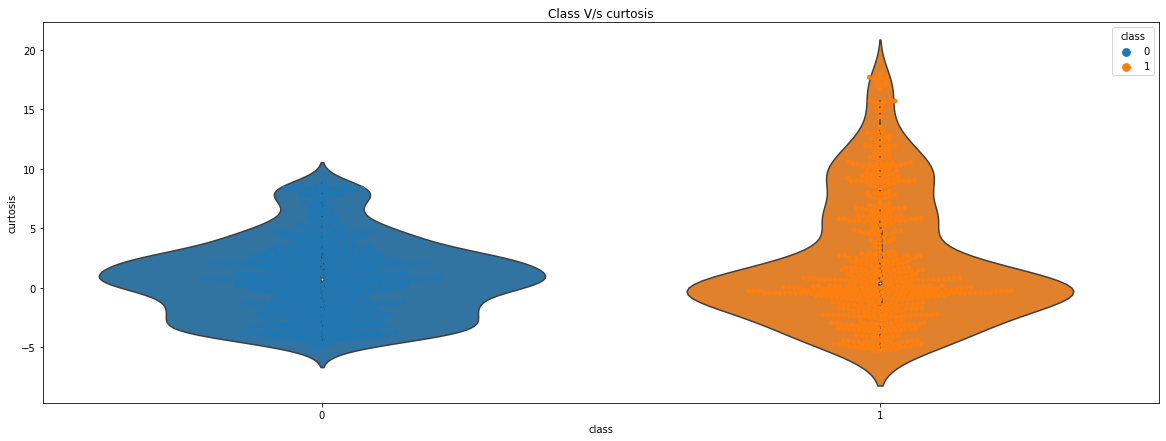

In [10]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'class', y = 'curtosis', data = bank_note_data, hue = 'class')
sns.violinplot(x = 'class', y = 'curtosis', data = bank_note_data)
plt.title('Class V/s curtosis')
plt.show()

In [11]:
#Standardize rows into uniform scale.

X= bank_note_data.drop(['class'], axis=1)
y= bank_note_data['class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

#Scale and centre the data

bank_note_data_normalized = scaler.transform(X)

#Create a pandas dataframe

bank_note_data_normalized = pd.DataFrame(data = X, index= X.index, columns= X.columns)

In [12]:
bank_note_data_normalized

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [13]:
bank_note_data_normalized.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=bank_note_data['class'])

In [15]:
X_train.shape

(960, 4)

In [16]:
X_test.shape

(412, 4)

In [17]:
y_train.shape

(960,)

In [18]:
y_test.shape

(412,)

In [19]:
#Create a Sequential model
from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Dropout(0.2, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

#Create a Keras version Optimiser
optimizer = tf.keras.optimizers.Adam()

#Compile and print the summary of model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics =['accuracy'])

# Model summary can be created by calling the summary() function on the model that returns a string that in turn can be printed.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Plot model summary

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
fitted_model = model.fit(
        X_train, y_train,
        epochs=50,  
        validation_data=(X_test, y_test)
        )

Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1714 - accuracy: 0.9281 - val_loss: 0.0724 - val_accuracy: 0.9854
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9281 - val_loss: 0.0596 - val_accuracy: 0.9964
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9171 - val_loss: 0.0705 - val_accuracy: 0.9781
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1852 - accuracy: 0.9281 - val_loss: 0.0655 - val_accuracy: 0.9891
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9781
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.2017 - accuracy: 0.9217 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1820 - accuracy: 0.9162 - val_loss: 0.0838 - val_accuracy: 0.9781
Epoch 8/50
35/35 [==

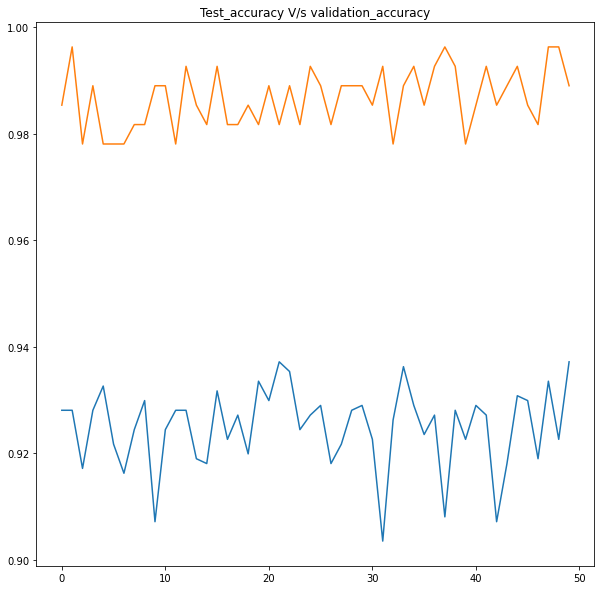

In [39]:
plt.figure(figsize=(10,10))
plt.title('Test_accuracy V/s validation_accuracy')
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.show()


In [22]:
eval = model.evaluate(X_test, y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval[0],eval[1]*100))


Loss, accuracy on test data: 
0.0678 99.27%


In [ ]:
history=model.history()

This concludes my code on bank note prediction. As can be seen, we have got an accuracy of ~99% .

In [24]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume you have a dataframe called 'data' with features and target variable
X = bank_note_data_normalized # Features
y = bank_note_data['class']  # Target variable

# Create an instance of KFold with the desired number of folds
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the evaluation scores
scores = []
accuracies=[]
fold=1

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Initialize and train your model
    model.fit(X_train, y_train,verbose=False)
    print('K-Fold',fold)
    fold+=1
    # Evaluate the model on the test set
    score = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_1=[1 if i[0]>0.5 else 0 for i in y_pred]
    accuracy=accuracy_score(y_test,y_pred_1)
    accuracies.append(accuracy)
    print(classification_report(y_test,y_pred_1))
    scores.append(score)

# Calculate the average score across all folds
print("scores :",scores)
print("avg_scores :",sum([sum(i) for i in scores])/len(scores))
print("accuracies :",accuracies)
print("avg_accuracies :",sum(accuracies)/len(accuracies))


K-Fold 1
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

K-Fold 2
9/9 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       156
           1       0.99      0.97      0.98       119

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275

K-Fold 3
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       163
           1       0.92      0.99      0.96       111

  

In [ ]:
fold_labels = range(1, k+1)
plt.plot(fold_labels, train_accuracies, label='Train Accuracy')
plt.plot(fold_labels, test_accuracies, label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies')
plt.legend()
plt.show()